In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization
#from jupyterthemes import jtplot #for styling matplotlib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
test_data = pd.read_csv(r'C:\Users\user\Desktop\test_1.csv')
train_data = pd.read_csv(r'C:\Users\user\Desktop\train_1.csv')

In [ ]:
#jtplot.style(theme = 'monokai', context = 'notebook', grid = False, ticks = False)

In [8]:
train_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?簸???簸???簸???簸???簸???簸...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [10]:
train_data.shape

(31962, 3)

In [11]:
train_data['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?簸???簸???簸???簸???簸???簸...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [12]:
train_data = train_data.drop('id', axis = 1)

In [13]:
train_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
#Exploring the dataset

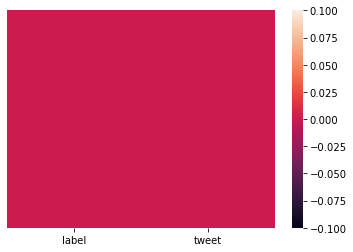

In [14]:
sns.heatmap(train_data.isnull(), yticklabels = False)
plt.show()

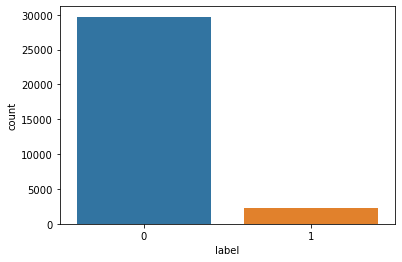

In [15]:
sns.countplot(x = train_data['label'])
plt.show()

In [16]:
len(train_data)

31962

In [17]:
length = list()
for i in range(len(train_data)):
    length.append(len(train_data.iloc[i,1]))

In [20]:
train_data['length'] = length

In [19]:
train_data.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


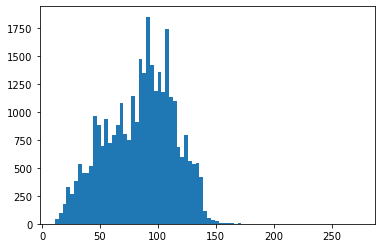

In [21]:
plt.hist(train_data['length'], bins = 80)
plt.show()

In [22]:
train_data.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [ ]:
#Illustrate the shortest tweets

In [23]:
train_data[train_data['length'] == min(train_data['length'])]['tweet'].iloc[0]

'i love you '

In [ ]:
#Illustrate the longest tweets

In [24]:
train_data[train_data['length'] == max(train_data['length'])]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis 簸???簸???簸???簸???簸???簸???簸???簸???簸???簸???簸???簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸??簣簸??簣簸?瞻?簸?瞻?簸??簣簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸?瞻?簸???簸???簸???簸???簸???簸???簸???璽?礎'

In [ ]:
# Average Length Tweet

In [25]:
train_data[train_data['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend 簸???簸??翹'

In [26]:
positive = train_data[train_data['label'] == 0]

In [ ]:
# Positive Reponse 

In [27]:
positive.describe()

,label,length
count,29720.0,29720.000000
mean,0.0,84.328634
std,0.0,29.566484
min,0.0,11.000000
25%,0.0,62.000000
50%,0.0,88.000000
75%,0.0,107.000000
max,0.0,274.000000


In [ ]:
# Negative Response

In [28]:
negative = train_data[train_data['label'] == 1]

In [29]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [31]:
negative.describe()

,label,length
count,2242.0,2242.000000
mean,1.0,90.187779
std,0.0,27.375502
min,1.0,12.000000
25%,1.0,69.000000
50%,1.0,96.000000
75%,1.0,111.000000
max,1.0,152.000000


In [32]:
from wordcloud import WordCloud

In [33]:
sentences = train_data['tweet'].tolist()

In [34]:
combined_sentences = " ".join(sentences)

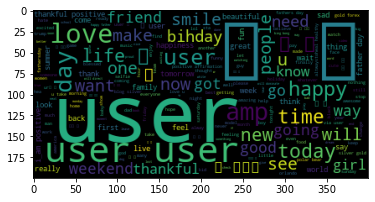

In [35]:
plt.imshow(WordCloud().generate(combined_sentences))
plt.show()

In [36]:
negative_sentences = negative['tweet'].tolist()

In [37]:
combined_negative_sentences = " ".join(negative_sentences)

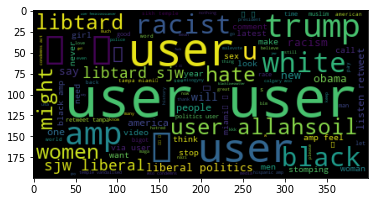

In [38]:
plt.imshow(WordCloud().generate(combined_negative_sentences))
plt.show()

In [39]:
# Cleaning the data

SyntaxError: invalid syntax (Temp/ipykernel_29360/3460482406.py, line 1)

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
import nltk

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [44]:
from nltk.corpus import stopwords

In [45]:
st = stopwords.words('english')
st.append("and")

In [46]:
Test = "Goblin and Ninja FoR the win!!"
test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        test_punc_removed.append(char)
test_punc_removed = ''.join(test_punc_removed)  

In [47]:
test_punc_removed

'Goblin and Ninja FoR the win'

In [48]:
test_punc_st_removed = []
for char in test_punc_removed.split():
    if char.lower() not in st:
        test_punc_st_removed.append(char)
test_punc_st_removed = " ".join(test_punc_st_removed)  

In [49]:
test_punc_st_removed

'Goblin Ninja win'

In [ ]:
# Tokenization

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
sample_data = ["This is my first paper", "This is the second document", "here is the third thi one"]

In [51]:
vectorizer = CountVectorizer()

In [58]:
X = vectorizer.fit_transform(sample_data)

In [59]:
vectorizer.get_feature_names_out()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names_out'

In [60]:
X.toarray()

array([[0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0]], dtype=int64)

In [61]:
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)  
    return test_punc_st_removed

In [62]:
message_cleaning("Goblin and Ninja fOR thE win!!")

'Goblin Ninja win'

In [63]:
train_data_clean = train_data['tweet'].apply(message_cleaning)

In [64]:
train_data['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [65]:
train_data_clean[5]

'22 huge fan fare big talking leave chaos pay disputes get allshowandnogo'

In [66]:
data = train_data_clean.tolist()

In [67]:
tweets_countvectorizer = CountVectorizer().fit_transform(data).toarray()

In [68]:
tweets_countvectorizer.shape

(31962, 45809)

In [69]:
X = tweets_countvectorizer
y = train_data['label']

In [70]:
X.shape

(31962, 45809)

In [71]:
y.shape

(31962,)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [74]:
from sklearn.naive_bayes import MultinomialNB #for discrete values

In [75]:
NB_classifier = MultinomialNB()

In [76]:
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [77]:
y_pred = NB_classifier.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [79]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5806,  147],
       [ 206,  234]], dtype=int64)

<AxesSubplot:>

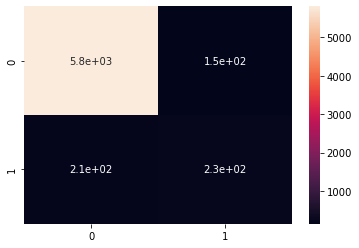

In [80]:
sns.heatmap(cm, annot = True)

In [81]:
ac = accuracy_score(y_test, y_pred)
ac

0.9447833567964962

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5953
           1       0.61      0.53      0.57       440

    accuracy                           0.94      6393
   macro avg       0.79      0.75      0.77      6393
weighted avg       0.94      0.94      0.94      6393

